# ***Sentiment Analysis on Movie Reviews Using The IMDb Dataset***

## Step 1: Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Step 2: Load and Preprocess Data

In [3]:
# Load IMBD Dataset

num_words = 10000  # Only keep the top 10,000 most frequently occurring words in the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Preprocess sequences to have a fixed length
maxlen = 200  # Maximum length of reviews
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


## Step 3: Build the Neural Network Model

In [7]:
model = models.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    layers.Conv1D(32, 5, activation='relu'),
    layers.MaxPooling1D(4),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])


## Step 4: Compile the Model

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Step 5: Train the Model

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 49s 78ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.5325 - val_accuracy: 0.8696
Epoch 2/5
625/625 [==============================] - 49s 79ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.6390 - val_accuracy: 0.8496
Epoch 3/5
625/625 [==============================] - 47s 75ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.6819 - val_accuracy: 0.8730
Epoch 4/5
625/625 [==============================] - 49s 79ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.5868 - val_accuracy: 0.8690
Epoch 5/5
625/625 [==============================] - 50s 80ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.6690 - val_accuracy: 0.8700


## Step 6: Evaluate the Model

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

782/782 [==============================] - 15s 19ms/step - loss: 0.7376 - accuracy: 0.8627
Test accuracy: 0.8627200126647949


## Step 7: Visualize Training History with Plotly

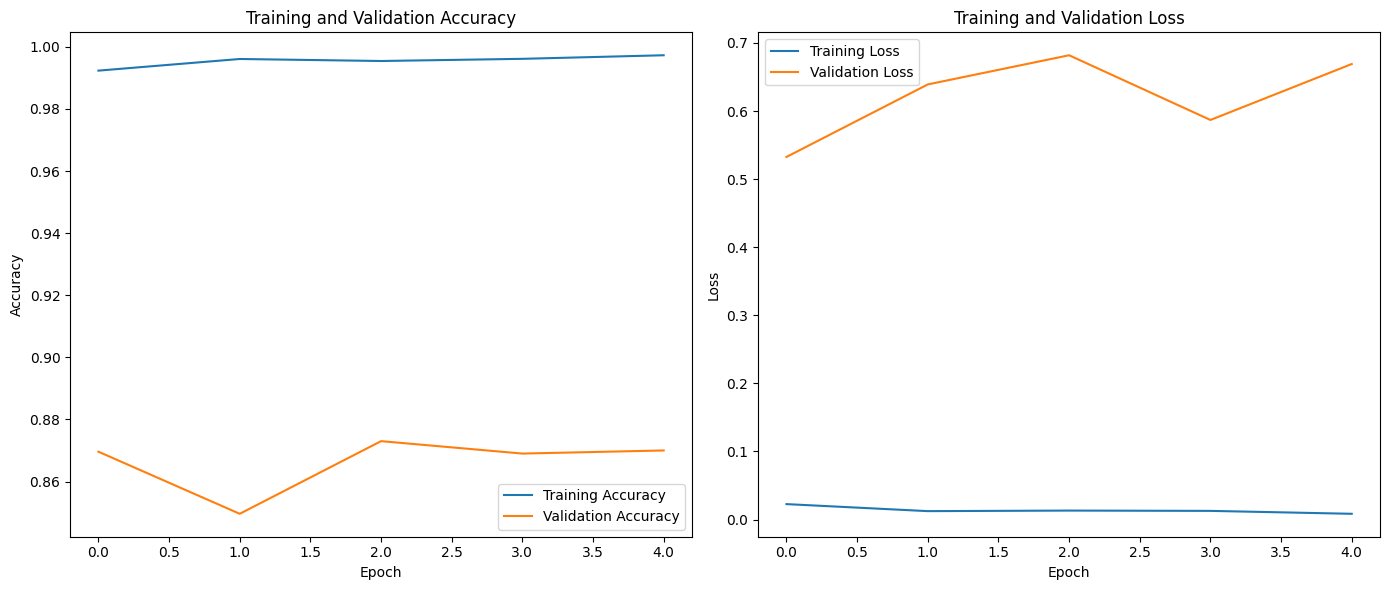

In [16]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()
